In [47]:
import matplotlib.pyplot as plt
import numpy as np

## Naive solution:

First of all, lets analize the naive solution. So, we predict the actual k^n time compexity. Let's measure the execution time for counting first 47 Fib numbers and make plot of it.

### Proof for time complexity:
Suppose that T(n) is a time complexity for counting the n-th Fib. number.
Recursion step:
`T(n) = T(n - 1) + T(n - 2) + O(1) > 2 * T(n - 2) + O(1)`
So after that, let's solve the equation. Let's choose `k^n` as the root:
`k^n = 2 * k^(n - 2)`
`k = sqrt(2)`

`T(n) = O(2^(n/2))`

### Experiment:
Let's execute the code and make a plot. Sorry, it took so much time for calculating the numbers, so I've stopped at 47-th one. You've said to try with 1000, 10000 and 100000, but it would take eternity to count the values XD


In [48]:
naive = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 4, 6, 11, 18, 29, 45, 73, 119, 195, 315, 516, 998, 1380, 2110, 4016, 6452, 9554, 21411, 30149, 47584, 99794, 126884, 191836, 290352, 362027, 580471, 895754, 1467984, 2047571, 3195968, 7271968, 9145066, 13146094, 18813861]

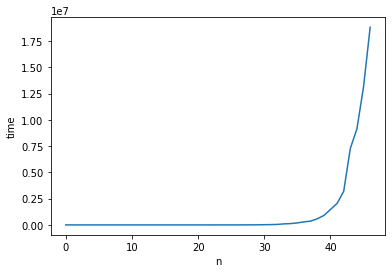

In [49]:
plt.plot(naive)
plt.ylabel('time')
plt.xlabel('n')
plt.show()

In [50]:
# First of all, I've replaced all zeros inside the array with 0.01 in order to prevent log(0)
# After that, I've called the actual log function and computed the log of every element inside the filtered array.
naive = np.log(list(map(lambda n: n if n > 0 else 0.01, naive)))

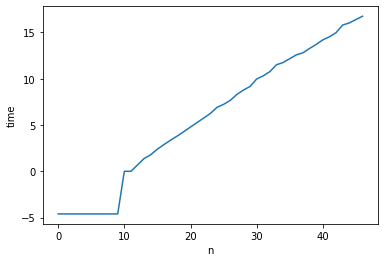

In [51]:
plt.plot(naive)
plt.ylabel('time')
plt.xlabel('n')
plt.show()

### Results for naive solution:

So, as we can see, in the log-scale, execution time for naive solution looks like the straight line. It proves that the actual running time complexity is p^n where p is some constant that depends on the hardware.

## Recursive solution:

Here we expect linear runtime for the solution.

### Proof for time complexity:
So, because of the memoization, each and every Fib number is getting counted only once. In order to get n-th Fib number, we need to know first n - 1 ones. So the time is linear.

In [52]:
memoized = [2, 8, 19, 28, 35, 89, 113, 85, 98, 108, 98, 113, 95, 96, 171, 133, 133, 169, 130, 146, 154, 152, 168, 168, 173, 180, 186, 194, 201, 208, 215, 235, 247, 325, 317, 318, 302, 276, 283, 275, 395, 333, 298, 306, 312, 322, 325, 363, 338, 346, 353, 360, 390, 389, 380, 388, 399, 437, 412, 415, 422, 428, 508, 449, 450, 459, 473, 521, 493, 486, 493, 499, 543, 616, 544, 546, 542, 585, 547, 555, 560, 651, 702, 605, 590, 598, 602, 609, 658, 630, 652, 676, 713, 832, 703, 696, 695, 707, 791, 721, 713, 717, 723, 942, 765, 743, 741, 757, 822, 798, 789, 778, 783, 838, 839, 807, 887, 943, 1222, 1179, 1195, 1038, 1001, 1149, 1072, 986, 930, 910, 1002, 1314, 1795, 1548, 2815, 1931, 3194, 1471, 1475, 1534, 1501, 1663, 1016, 1566, 1559, 1556, 1694, 1142, 1482, 1737, 1615, 1730, 1544, 2546, 3212, 2123, 2369, 1838, 1961, 3051, 2730, 1963, 1786, 9538, 2922, 1947, 2943, 1951, 2853, 2296, 1818, 1495, 1230, 1902, 4956, 5158, 2981, 4552, 2122, 2059, 1952, 2008, 2213, 1965, 3292, 2649, 8385, 2045, 2529, 4900, 2140, 2056, 12588, 2134, 2093, 2015, 10676, 4111, 2269, 3121, 3566, 3084, 2747, 2110, 3657, 3242, 3111, 28233, 2337, 2501, 2295, 2337, 12511, 2292, 3110, 5212, 2396, 2359, 2616, 2384, 4425, 2439, 2492, 2682, 7894, 2531, 2483, 2445, 5497, 2574, 2505, 12311, 2755, 6015, 2562, 2619, 2554, 12991, 2944, 2572, 2588, 4445, 2694, 2878, 6117, 3222, 2792, 2774, 2947, 4652, 2797, 2762, 2771, 2964, 2785, 10715, 2851, 2871, 3058, 3439, 2874, 2877, 3452, 3625, 3073, 3247, 2984, 2883, 9076, 2730, 3378, 3050, 3075, 3059, 3236, 2990, 4551, 3023, 3137, 3318, 3071, 3063, 3980, 3113, 4247, 3808, 3133, 3476, 4314, 3392, 3107, 3217, 3234, 3252, 3699, 5593, 3431, 4084, 3227, 3332, 3580, 3365, 6861, 14714, 3230, 8889, 69949, 21418, 18072, 3587, 18040, 9807, 4519, 3513, 6901, 5794, 6017, 5695, 14035, 3539, 7704, 9648, 3943, 9324, 4765, 3836, 3553, 4970, 7861, 3600, 4470, 7543, 14819, 5770, 3325, 8863, 3909, 9845, 18237, 7285, 5072, 10178, 3916, 12262, 11426, 13735, 10852, 18510, 8754, 4287, 4148, 9342, 3621, 17067, 3954, 3940, 5230, 7018, 3943, 3896, 4367, 7801, 3902, 3944, 4056, 4077, 7388, 4356, 7177, 4079, 11343, 4233, 4182, 7761, 4264, 7362, 9603, 4454, 10885, 4172, 4867, 5502, 4156, 4270, 5087, 4293, 8354, 4371, 7659, 4300, 4293, 4222, 5965, 4323, 4295, 4560, 4137, 4879, 4382, 4408, 4356, 6334, 5003, 16161, 4526, 4509, 4403, 4763, 5168, 4851, 7494, 5837, 4921, 4540, 4594, 4640, 7637, 6546, 8337, 4578, 7242, 5208, 13982, 10949, 4778, 4810, 5564, 11906, 4656, 6560, 5411, 6671, 5715, 5944, 5439, 5805, 9020, 5048, 3802, 5388, 4850, 4760, 5024, 6523, 4910, 5169, 4885, 5244, 5350, 5235, 4990, 4997, 4895, 10670, 5017, 5028, 4219, 7967, 5379, 5265, 5115, 6644, 5117, 5460, 5751, 5208, 5675, 16668, 6214, 5172, 5196, 5173, 5242, 5798, 5760, 5273, 8475, 5275, 6209, 4885, 16572, 6330, 12056, 9035, 6061, 11041, 5493, 17774, 6499, 12495, 5609, 6165, 5500, 5557, 20076, 5865, 8202, 5432, 5529, 10121, 6397, 4743, 6835, 6494, 5839, 5531, 5534, 6840, 6370, 5032, 5379, 4084, 5891, 4923, 6476, 5668, 5500, 5904, 5663, 6423, 6220, 4205, 5151, 11576, 5865, 6479, 6213, 4006, 3868, 4828, 6634, 5605, 5770, 5428, 6048, 6178, 5053, 4214, 10242, 6350, 5949, 3993, 4523, 6025, 6422, 5747, 4973, 6004, 6104, 4600, 5123, 4475, 4502, 4648, 10351, 6058, 5795, 6323, 5606, 5654, 6156, 10640, 6763, 5549, 5756, 5981, 6483, 10145, 8551, 4224, 6263, 6589, 6454, 6184, 5766, 6324, 6735, 6182, 5781, 5476, 6056, 6133, 6296, 10467, 5126, 5107, 5934, 4059, 4243, 4157, 5329, 4907, 4761, 5948, 5176, 6077, 6914, 5838, 5963, 10056, 6713, 5142, 5612, 6288, 6387, 5355, 5231, 6391, 5333, 4427, 4857, 5518, 6204, 5064, 5910, 9611, 6440, 5875, 4238, 4073, 6647, 6318, 5932, 5696, 5932, 4197, 4229, 5944, 4721, 4338, 9149, 4818, 5298, 4570, 4372, 4767, 4329, 4532, 4625, 4639, 4482, 4324, 4706, 4975, 4784, 4921, 5019, 4704, 7133, 11909, 4616, 4824, 4364, 5873, 7112, 5052, 4585, 4677, 5619, 5246, 5908, 6348, 6954, 7401, 6369, 4497, 4614, 10148, 4830, 4421, 4856, 7042, 4895, 4797, 5369, 5281, 4557, 5109, 4940, 4528, 4385, 4427, 4314, 6866, 8431, 4320, 4478, 4829, 4712, 5925, 4691, 5019, 4405, 4639, 5238, 5018, 4427, 4529, 5467, 5315, 4493, 8895, 5987, 4917, 4937, 4705, 4768, 4634, 4937, 5071, 4988, 4524, 4706, 5712, 6040, 4533, 4668, 9295, 4785, 5080, 4629, 5058, 4784, 4555, 5390, 4912, 4967, 4653, 4666, 5418, 5441, 4619, 4666, 8590, 4740, 5309, 4811, 5238, 4758, 5641, 5904, 5104, 4728, 10602, 6089, 5284, 4953, 5102, 5566, 9528, 6059, 4923, 6875, 6668, 6455, 6713, 6231, 5946, 5915, 6367, 6722, 4679, 5230, 6018, 4670, 8535, 4937, 5025, 4692, 4870, 5471, 5379, 4720, 5349, 4884, 5184, 5410, 4967, 5122, 5035, 4800, 8798, 5550, 4844, 4845, 5013, 5633, 4908, 5125, 5136, 4972, 5519, 5062, 5119, 5132, 4867, 9136, 5351, 5095, 5050, 5905, 5563, 5033, 6157, 5536, 5475, 5578, 5499, 5499, 4997, 6966, 6199, 5107, 4982, 5284, 5949, 5130, 5530, 5617, 5081, 5168, 5168, 5980, 5072, 6232, 6206, 5389, 5449, 5680, 6080, 5193, 11047, 6612, 5255, 8433, 6481, 5459, 5747, 7914, 6592, 7420, 6986, 8611, 6508, 6806, 6240, 6780, 5666, 5249, 6467, 6086, 5378, 7463, 5787, 5445, 5353, 5726, 5422, 5802, 5493, 5731, 5268, 5497, 6025, 6327, 5698, 6812, 5774, 5929, 5518, 5930, 5223, 5241, 7695, 5633, 5305, 6004, 6968, 6269, 7526, 5794, 5567, 6250, 7693, 5324, 5391, 5668, 5921, 5813, 5389, 7064, 5790, 7268, 6573, 5281, 5747, 5456, 6219, 5830, 5585, 5788, 5445, 5384, 5581, 6305, 7106, 5536, 6041, 5739, 6113, 5876, 6385, 7761, 8338, 6142, 5565, 5555, 5505, 7417, 7848, 5515, 5601, 5712, 6897, 6417, 5734, 6502, 5675, 6290, 6367, 5548, 5526, 6549, 5748, 5915, 7708, 5616, 5548, 5757, 6192, 5577, 5692, 5854, 5585, 5533, 6116, 6003, 5870, 5624, 5982, 6124, 5763, 5688, 5824, 6613, 6895, 5670, 5629, 5623, 6250, 6135, 5676, 6031, 6035, 6003, 6281, 5905, 5694, 5864, 5893, 6171, 7713, 5966, 5778, 5732, 6363, 6469, 5835, 5881, 5854, 6478, 5901, 5984, 5892, 5922, 6082, 6369, 5978, 6028, 6158, 9103, 6457, 6561, 6133, 6323, 6429, 10383, 6517, 6013, 6108, 8137, 7269]

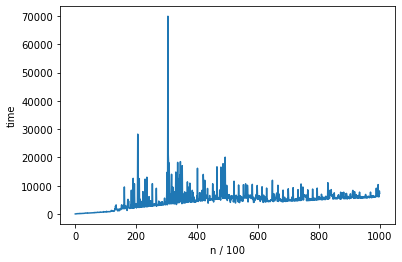

In [53]:
plt.plot(memoized)
plt.ylabel('time')
plt.xlabel('n / 100')
plt.show()

So, as we can see, the plot itself looks like a line but due to some technical features or issues, we can see some values that are going straightly up or down the actual line. Basically it happens because the processor works unstable and it decides how to compute the actual by itself, so can see some "lags" here.

In [54]:
# Lets remove "blowouts" from the array
# I've replaced all the numbers that are greater than 10000 by 10000.
memoized = list(map(lambda n: 10**4 if n > 10**4 else n, memoized))

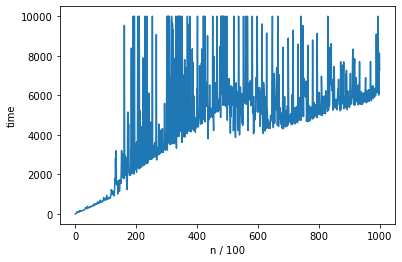

In [55]:
plt.plot(memoized)
plt.ylabel('time')
plt.xlabel('n / 100')
plt.show()

So, after I've removed some critical blowouts, we can be sure that the run time for the algorithm is linear.

In [56]:
dp = [25, 8, 16, 23, 31, 22, 28, 29, 33, 41, 41, 45, 53, 53, 57, 67, 66, 70, 74, 78, 82, 94, 90, 97, 120, 166, 188, 168, 116, 119, 135, 127, 131, 135, 139, 143, 160, 152, 156, 217, 179, 194, 173, 177, 181, 185, 189, 333, 414, 203, 205, 210, 341, 229, 221, 226, 230, 330, 239, 242, 246, 250, 356, 424, 425, 417, 352, 396, 328, 285, 287, 325, 452, 302, 357, 490, 494, 683, 353, 323, 328, 332, 604, 539, 539, 542, 552, 561, 642, 369, 369, 372, 377, 483, 414, 3579, 570, 563, 717, 452, 412, 470, 710, 870, 527, 502, 452, 439, 692, 455, 451, 477, 461, 570, 485, 590, 477, 488, 863, 493, 493, 497, 501, 553, 510, 513, 517, 534, 594, 531, 611, 538, 577, 591, 679, 558, 583, 653, 662, 721, 628, 589, 602, 592, 662, 595, 655, 637, 651, 769, 631, 619, 623, 626, 713, 637, 638, 741, 648, 724, 659, 809, 714, 899, 1027, 686, 705, 769, 741, 831, 700, 701, 752, 710, 841, 878, 854, 732, 729, 733, 851, 749, 769, 754, 762, 836, 764, 984, 783, 773, 880, 787, 1054, 860, 867, 906, 807, 806, 883, 821, 950, 849, 832, 831, 835, 959, 881, 892, 863, 855, 1180, 880, 869, 872, 980, 1056, 1082, 899, 891, 894, 930, 1039, 960, 919, 917, 921, 1037, 935, 935, 938, 942, 1076, 964, 1096, 965, 1160, 1124, 1062, 981, 974, 982, 1127, 1000, 3901, 1268, 1033, 1142, 1126, 1030, 1029, 1024, 1261, 1148, 1093, 1045, 1462, 1847, 1116, 1106, 1088, 1109, 1074, 1252, 1086, 1260, 1100, 1090, 1295, 1181, 1148, 1155, 1182, 1297, 1126, 1124, 1222, 1136, 1313, 1149, 1153, 1147, 1282, 1303, 1165, 1178, 1383, 1249, 1372, 1187, 1245, 1193, 1221, 1357, 1242, 1206, 1244, 1231, 1831, 1560, 1547, 1574, 1247, 1305, 1486, 1253, 1255, 1378, 1262, 1644, 1507, 1440, 1964, 1397, 1644, 1871, 1328, 2073, 1933, 1575, 1333, 1315, 1372, 1321, 2064, 5688, 1670, 1621, 1788, 2492, 1805, 1438, 1420, 1545, 1651, 2055, 1809, 1650, 1401, 2111, 1897, 1803, 1404, 1396, 1557, 1826, 1445, 1481, 2327, 2136, 1608, 1437, 1695, 1593, 1474, 1653, 2494, 1596, 1729, 2114, 1709, 1479, 1538, 1558, 1497, 2457, 1885, 1575, 2522, 1880, 2406, 1721, 1536, 1526, 1529, 1856, 1627, 1544, 1594, 1783, 1783, 1850, 1754, 1665, 1729, 1979, 1584, 1804, 1594, 1599, 1768, 2466, 2199, 2405, 1763, 1915, 1976, 2047, 1704, 5714, 2405, 2811, 2548, 2555, 2490, 1660, 1925, 1949, 1699, 1903, 2597, 1875, 1730, 1693, 1882, 1850, 1886, 1821, 1815, 1719, 2009, 1928, 2005, 2127, 1938, 1978, 2313, 1749, 1959, 1922, 2173, 1919, 2328, 1961, 1806, 1783, 1839, 2087, 2516, 3128, 2860, 2699, 3482, 2886, 2742, 2666, 1948, 2557, 1847, 1837, 1844, 2062, 5620, 1961, 2072, 1985, 2110, 2363, 2035, 1912, 2053, 1950, 2143, 2109, 1998, 2309, 2030, 2149, 1939, 2254, 2111, 1927, 2117, 2171, 2073, 2077, 1953, 2016, 2187, 2033, 2032, 2236, 2619, 2358, 2001, 1984, 1991, 1996, 2216, 2094, 2063, 2173, 2014, 2360, 2036, 2141, 2032, 2038, 2302, 2113, 2065, 2361, 4031, 2401, 2114, 2058, 2142, 2408, 2653, 2090, 2116, 2101, 2098, 2433, 2124, 2113, 2112, 2203, 2245, 2712, 2145, 2169, 2130, 2251, 2607, 2227, 2397, 2171, 2553, 2704, 2317, 2280, 2297, 2238, 2583, 2207, 2419, 2250, 2373, 2586, 2561, 2482, 2256, 2401, 2792, 4750, 2237, 2238, 2249, 2567, 2444, 2252, 2394, 2266, 2554, 2272, 2274, 2278, 2387, 2300, 2580, 2420, 2320, 2363, 2308, 2595, 2320, 2362, 2324, 2482, 2669, 2348, 2354, 2356, 2380, 2647, 2361, 2501, 2395, 2390, 2706, 2404, 2384, 2669, 2404, 3089, 2412, 2445, 2868, 3736, 2841, 2446, 2727, 2552, 2467, 2726, 2445, 2508, 2593, 2453, 2564, 2825, 2807, 2485, 2505, 2487, 2977, 2581, 2523, 2494, 2568, 2802, 2508, 2756, 2543, 2742, 2847, 2530, 2662, 2550, 2549, 3010, 2632, 2951, 2598, 2559, 2896, 2565, 2637, 4061, 2921, 2900, 3073, 2634, 2693, 2766, 3271, 2715, 2803, 2658, 2615, 2968, 3112, 3502, 3126, 2833, 2662, 3022, 2874, 2707, 3245, 2742, 3859, 3864, 2834, 2828, 3165, 3077, 2854, 2714, 2745, 2708, 3083, 3518, 2752, 2723, 2733, 3331, 4185, 3289, 2791, 2982, 3174, 2767, 2765, 3657, 2892, 3071, 2827, 2780, 2788, 3212, 3095, 2930, 2708, 2827, 2808, 2722, 3119, 2751, 3085, 2738, 2746, 3133, 2748, 2776, 2761, 2984, 3133, 2902, 2798, 2805, 2886, 4031, 3875, 2877, 2833, 2799, 3439, 2829, 2948, 2809, 2822, 3156, 2828, 2991, 2954, 3129, 3175, 2866, 2865, 2932, 3086, 3655, 2870, 2990, 2941, 2930, 3163, 3386, 2927, 2960, 2910, 2930, 3282, 3813, 3006, 2914, 3254, 4721, 3202, 3422, 3064, 2959, 3306, 3163, 2968, 3185, 3507, 3380, 2985, 3014, 2984, 3086, 4039, 3425, 3021, 3039, 3034, 3740, 3264, 3066, 3052, 3247, 3499, 3134, 3221, 3904, 3211, 3457, 3309, 4150, 5626, 3638, 3740, 4002, 3174, 3409, 3460, 5571, 3880, 3869, 3829, 4128, 3535, 6372, 4544, 3219, 3358, 3768, 5354, 4558, 5478, 3499, 3642, 3794, 3491, 3423, 3188, 3191, 3717, 4475, 4664, 3414, 3269, 3595, 3275, 4710, 4408, 4124, 3846, 3870, 3388, 3251, 3230, 3277, 3847, 3419, 3499, 4164, 3276, 4020, 3470, 3449, 3791, 3296, 3611, 3403, 3529, 3456, 3360, 3728, 3308, 3360, 3404, 4119, 5211, 3336, 3317, 3359, 3430, 3738, 3363, 3391, 3351, 3449, 3855, 3438, 3376, 3408, 3487, 4301, 4093, 4716, 3656, 3766, 4131, 4125, 3700, 4467, 4384, 3905, 5744, 4364, 3445, 3954, 3578, 4156, 3462, 3855, 3845, 3777, 4282, 3681, 3865, 3714, 3952, 4150, 3948, 3486, 4087, 3635, 4387, 3512, 3702, 3571, 5119, 3909, 3563, 3543, 3669, 3631, 4328, 3541, 3545, 3586, 3661, 4123, 3678, 3681, 3564, 3791, 3736, 3922, 3471, 3645, 3471, 3605, 4154, 3500, 4945, 3970, 3636, 4040, 3510, 3734, 3702, 3690, 4135, 3551, 3583, 4193, 4052, 4315, 3924, 4351, 3554, 3862, 6493, 4114, 4721, 4352, 5379, 5837, 4098, 4134, 3821, 4110, 4169, 3798, 3806, 4549, 6022, 4229, 4436, 4049, 4404, 3724, 5005, 7956, 4459, 4035, 3690, 3764, 4156, 3889, 3755, 6267, 5344, 4776, 3764, 3774, 4116, 4216, 4700, 3896, 3766, 3913, 4459, 6542, 6315, 4540, 4506, 4020, 4151, 4800, 6208, 4316, 3961, 4763, 4134, 3870, 5181, 6188, 8796, 6146, 4039, 4078, 4813, 4743, 6410, 5671, 5366, 5871, 6503, 5618, 4777, 5380, 5556, 4887, 4592]

## Dp solution:

Here we expect linear runtime for the solution.

### Proof for time complexity:
So, because of the memoization, each and every Fib number is getting counted only once. In order to get n-th Fib number, we need to know first n - 1 ones. So the time is linear.
Actually the code consists of just 1 for loop, so what's the point =) ?

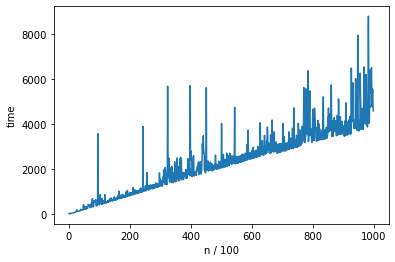

In [57]:
plt.plot(dp)
plt.ylabel('time')
plt.xlabel('n / 100')
plt.show()

Here we see some blowouts as well. lets remove them

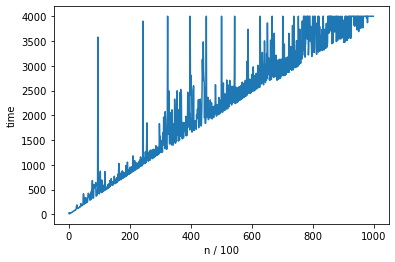

In [58]:
# Lets remove "blowouts" from the array
# I've replaced all the numbers that are greater than 4*10**4 by 4*10**4.
dp = list(map(lambda n: 4*(10**3) if n > 4*(10**3) else n, dp))
plt.plot(dp)
plt.ylabel('time')
plt.xlabel('n / 100')
plt.show()

Line as well, but the coefficient is straightly lower than the coefficient for the memoized one. That's because the solutions have the same assympthotic but dufferent constant (the second one is more optimized).